# LSTM

In [1]:
import os
import glob
import numpy as np
import keras
from keras import *
import tensorflow as tf

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [3]:
def load_data(vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join("./data/", '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

    
        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)


    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
#     print(x_train)
    return x_train, y_train, x_test, y_test, class_names

In [4]:
Xtrain, Ytrain, Xtest, Ytest, class_names = load_data()
num_classes = len(class_names)
image_size = 28

snake


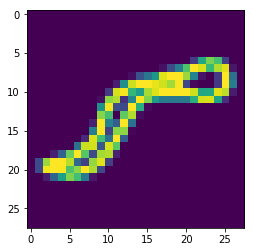

In [5]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(Xtrain))
plt.imshow(Xtrain[idx].reshape(28,28)) 
print(class_names[int(Ytrain[idx].item())])

In [6]:
# Reshape and normalize
x_train = Xtrain.reshape(Xtrain.shape[0], image_size, image_size).astype('float32')
x_test = Xtest.reshape(Xtest.shape[0], image_size, image_size).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(Ytrain, num_classes)
y_test = keras.utils.to_categorical(Ytest, num_classes)

In [7]:
x_train = np.array(Xtrain).reshape((-1, 28, 28))
x_test = np.array(Xtest).reshape((-1, 28, 28))

In [8]:
model = Sequential()
model.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(30,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 299,550
Trainable params: 299,550
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.fit(x_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 120000 samples, validate on 30000 samples
Epoch 1/50
18s - loss: 1.8460 - acc: 0.4585 - val_loss: 1.4335 - val_acc: 0.5760
Epoch 2/50
15s - loss: 1.2998 - acc: 0.6109 - val_loss: 1.2463 - val_acc: 0.6276
Epoch 3/50
15s - loss: 1.1530 - acc: 0.6564 - val_loss: 1.1627 - val_acc: 0.6564
Epoch 4/50
15s - loss: 1.0677 - acc: 0.6814 - val_loss: 1.0956 - val_acc: 0.6735
Epoch 5/50
15s - loss: 1.0070 - acc: 0.6988 - val_loss: 1.0654 - val_acc: 0.6825
Epoch 6/50
15s - loss: 0.9642 - acc: 0.7116 - val_loss: 1.0262 - val_acc: 0.6957
Epoch 7/50
15s - loss: 0.9187 - acc: 0.7250 - val_loss: 1.0124 - val_acc: 0.6969
Epoch 8/50
15s - loss: 0.8865 - acc: 0.7330 - val_loss: 0.9911 - val_acc: 0.7056
Epoch 9/50
16s - loss: 0.8537 - acc: 0.7419 - val_loss: 0.9828 - val_acc: 0.7070
Epoch 10/50
15s - loss: 0.8263 - acc: 0.7507 - val_loss: 0.9707 - val_acc: 0.7150
Epoch 11/50
16s - loss: 0.7972 - acc: 0.7595 - val_loss: 0.9570 - val_acc: 0.7175
Epoch 12/50
15s - loss: 0.7728 - acc: 0.7661 - val_loss:

In [10]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 72.25%


# CNN

In [11]:
def load_data(vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join("./data/", '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
#     print(x_train)
    return x_train, y_train, x_test, y_test, class_names

In [12]:
x_train, y_train, x_test, y_test, class_names = load_data()
num_classes = len(class_names)
image_size = 28

car


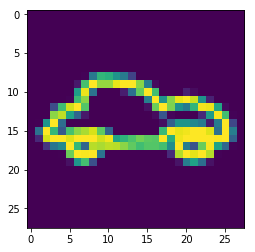

In [13]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [14]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.utils import np_utils
from keras.models import load_model

In [27]:
# Define model
model = Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [23]:
model.fit(x_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 120000 samples, validate on 30000 samples
Epoch 1/50
4s - loss: 1.3616 - top_k_categorical_accuracy: 0.8746 - val_loss: 0.8584 - val_top_k_categorical_accuracy: 0.9442
Epoch 2/50
3s - loss: 0.7268 - top_k_categorical_accuracy: 0.9544 - val_loss: 0.6738 - val_top_k_categorical_accuracy: 0.9576
Epoch 3/50
3s - loss: 0.5851 - top_k_categorical_accuracy: 0.9641 - val_loss: 0.6086 - val_top_k_categorical_accuracy: 0.9602
Epoch 4/50
3s - loss: 0.5088 - top_k_categorical_accuracy: 0.9692 - val_loss: 0.5362 - val_top_k_categorical_accuracy: 0.9661
Epoch 5/50
3s - loss: 0.4583 - top_k_categorical_accuracy: 0.9723 - val_loss: 0.5093 - val_top_k_categorical_accuracy: 0.9675
Epoch 6/50
3s - loss: 0.4173 - top_k_categorical_accuracy: 0.9755 - val_loss: 0.4937 - val_top_k_categorical_accuracy: 0.9684
Epoch 7/50
3s - loss: 0.3849 - top_k_categorical_accuracy: 0.9772 - val_loss: 0.4800 - val_top_k_categorical_accuracy: 0.9693
Epoch 8/50
3s - loss: 0.3613 - top_k_categorical_accuracy: 0.9791 -

In [24]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.45%
